In [5]:
# -*- coding: utf-8 -*-
from underthesea import word_tokenize
import re
import VietnameseTextNormalizer.ReleasePython3.VietnameseTextNormalizer as nm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# dataset = pd.read_csv("uit-post-dataset.csv")
# dataset

,label,text,with_stop_words,without_stop_words
0,1,[TSSĐH]-THÔNG BÁO TỔ CHỨC LỚP ÔN TẬP CHUẨN BỊ ...,tsđh thông báo tổ chức lớp ôn tập chuẩn bị tuy...,tsđh thông báo tổ chức lớp ôn tập tuyển sinh c...
1,1,💗💗 Giao lưu cùng Nhà báo- Nhà thơ Nguyễn P...,giao lưu cùng nhà báo nhà thơ nguyễn phong việ...,giao lưu nhà báo nhà thơ nguyễn phong việt phò...
2,1,Phòng Công tác Sinh viên thông tin đến sinh vi...,phòng ctsv thông tin đến sinh viên về thời gia...,phòng ctsv thông tin sinh viên làm việc không ...
3,1,🔬 Các chuyên ngành đào tạo trường Đại học Kans...,các chuyên ngành đào tạo trường đại học kansai...,chuyên ngành đào tạo trường đại học kansai osa...
4,1,👉 Bật mí với các bạn một chương trình vô cùng ...,bật mí với các bạn một chương trình vô cùng hấ...,bật mí chương trình vô cùng hấp dẫn diễn nhà v...
...,...,...,...,...
9089,1,Bạn này vừa đến Trường nộp Giấy kết quả thi TH...,bạn này vừa đến trường nộp giấy kết quả thi th...,trường nộp giấy kết quả thi thpt quốc gia xác ...
9090,1,Các em nhỏ nhớ đi MHX2020 nha\nChị share để ki...,các em nhỏ nhớ đi nhé chị share để kiểu khai t...,đi share kiểu khai trương group share mấy grou...
9091,3,# chào mình đỗ ktpm clc ... bác nào chung khoa...,chào mình đỗ ktpm clc bác nào chung khoa làm q...,chào đỗ ktpm clc khoa làm quen mail edu trường...
9092,1,"Chào các bạn, phòng Công tác Sinh viên đã đăng...",chào các bạn phòng ctsv đã đăng tải hướng dẫn ...,chào phòng ctsv đăng tải hướng dẫn tân sinh vi...


In [6]:
dataset = pd.read_csv("uit-post-dataset2.csv")
dataset

,label,text,with_stop_words,without_stop_words
0,1,[TSSĐH]-THÔNG BÁO TỔ CHỨC LỚP ÔN TẬP CHUẨN BỊ ...,tsđh thông_báo tổ_chức lớp ôn_tập chuẩn_bị tuy...,tsđh thông_báo tổ_chức lớp ôn_tập tuyển_sinh c...
1,1,💗💗 Giao lưu cùng Nhà báo- Nhà thơ Nguyễn P...,giao_lưu cùng nhà_báo nhà_thơ nguyễn_phong_việ...,giao_lưu nhà_báo nhà_thơ nguyễn_phong_việt phò...
2,1,Phòng Công tác Sinh viên thông tin đến sinh vi...,phòng ctsv thông_tin đến sinh_viên về thời_gia...,phòng ctsv thông_tin sinh_viên làm_việc không_...
3,1,🔬 Các chuyên ngành đào tạo trường Đại học Kans...,các chuyên_ngành đào_tạo trường đại_học kansai...,chuyên_ngành đào_tạo trường đại_học kansai osa...
4,1,👉 Bật mí với các bạn một chương trình vô cùng ...,bật_mí với các bạn một chương_trình vô_cùng hấ...,bật_mí chương_trình vô_cùng hấp_dẫn diễn nhà_v...
...,...,...,...,...
9089,1,Bạn này vừa đến Trường nộp Giấy kết quả thi TH...,bạn này vừa đến trường nộp giấy kết_quả thi th...,trường nộp giấy kết_quả thi thpt quốc_gia xác_...
9090,1,Các em nhỏ nhớ đi MHX2020 nha\nChị share để ki...,các em nhỏ nhớ đi nhé chị share để kiểu khai_t...,đi share kiểu khai_trương group share mấy grou...
9091,3,# chào mình đỗ ktpm clc ... bác nào chung khoa...,chào mình đỗ ktpm clc bác nào chung khoa làm_q...,chào đỗ ktpm clc khoa làm_quen mail edu trường...
9092,1,"Chào các bạn, phòng Công tác Sinh viên đã đăng...",chào các bạn phòng ctsv đã đăng_tải hướng_dẫn ...,chào phòng ctsv đăng_tải hướng_dẫn tân sinh_vi...


In [ ]:
from gensim.models import Word2Vec

In [31]:
sentences = [dataset.iloc[i]['with_stop_words'].split() for i in range(dataset.shape[0])]

In [60]:
len(sentences)

9094

In [83]:
# initialize word vectors
word_vectors = Word2Vec(size=400, min_count=2)

# create entries for the words in our vocabulary
word_vectors.build_vocab(sentences)

# fill entries with pre-trained word vectors
word_vectors.intersect_word2vec_format('wiki.vi.model.bin', binary=True)

# save model
word_vectors.save('word_vectors.model')

In [84]:
w2v_model = Word2Vec.load('word_vectors.model')

In [77]:
word_vectors.wv.vocab

{'thông_báo': <gensim.models.keyedvectors.Vocab at 0x7fdb47d51978>,
 'tổ_chức': <gensim.models.keyedvectors.Vocab at 0x7fdb2e99fe80>,
 'lớp': <gensim.models.keyedvectors.Vocab at 0x7fdb2e99fda0>,
 'ôn_tập': <gensim.models.keyedvectors.Vocab at 0x7fdb4873d0f0>,
 'chuẩn_bị': <gensim.models.keyedvectors.Vocab at 0x7fdb4858ce10>,
 'tuyển_sinh': <gensim.models.keyedvectors.Vocab at 0x7fdb2cb0cfd0>,
 'chương_trình': <gensim.models.keyedvectors.Vocab at 0x7fdb2cb0cf98>,
 'đào_tạo': <gensim.models.keyedvectors.Vocab at 0x7fdb2cb0cf60>,
 'trình_độ': <gensim.models.keyedvectors.Vocab at 0x7fdb2cb0cf28>,
 'thạc_sĩ': <gensim.models.keyedvectors.Vocab at 0x7fdb2cb0cef0>,
 'đợt': <gensim.models.keyedvectors.Vocab at 0x7fdb2cb0ceb8>,
 'năm': <gensim.models.keyedvectors.Vocab at 0x7fdb2cb0ce80>,
 'chi_tiết': <gensim.models.keyedvectors.Vocab at 0x7fdb2cb0ce48>,
 'mời': <gensim.models.keyedvectors.Vocab at 0x7fdb2cb0ce10>,
 'các': <gensim.models.keyedvectors.Vocab at 0x7fdb2cb0cdd8>,
 'bạn': <gensim.mo

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [18]:
tf = TfidfVectorizer(min_df=5,max_df= 0.8,max_features=3000,sublinear_tf=True)
tf.fit(dataset['with_stop_words'])
X = tf.transform(dataset['with_stop_words'])
print(tf.get_feature_names())

['ac', 'ace', 'acm', 'acoustic', 'ad', 'admin', 'aec', 'ahihi', 'ai', 'aiesec', 'al', 'alo', 'am', 'american', 'an', 'an_ninh', 'an_toàn', 'and', 'android', 'anh', 'anh_chị', 'anh_chị_em', 'anh_dũng', 'anh_em', 'anh_hùng', 'anti', 'ap', 'aply', 'are', 'as', 'asean', 'asus', 'at', 'athena', 'auto', 'av', 'avatar', 'ba', 'back', 'backend', 'bait', 'balo', 'ban', 'ban_giám_hiệu', 'ban_đầu', 'banh', 'bao', 'bao_giờ', 'bao_gồm', 'bao_nhiêu', 'bay', 'bch', 'be', 'bento', 'best', 'bgk', 'bh', 'bht', 'bhtcnpm', 'bhtcnt', 'bhyt', 'bi', 'bibo', 'biên_giới', 'biến', 'biết', 'biết_đâu', 'biển', 'biểu_diễn', 'biểu_mẫu', 'biệt', 'bk', 'blockchain', 'bluetoth', 'bn', 'bok', 'bonus', 'box', 'bro', 'bt', 'btc', 'building', 'bus', 'busines', 'buồn', 'buổi', 'by', 'bà', 'bà_con', 'bài', 'bài_bản', 'bài_giảng', 'bài_học', 'bài_toán', 'bài_tập', 'bàn', 'bàn_phím', 'bày', 'bác', 'bách_khoa', 'bán', 'bán_kết', 'bánh', 'bánh_kẹo', 'bánh_tráng', 'báo', 'báo_cáo', 'bây', 'bây_giờ', 'bãi', 'bãi_tập', 'bão', 'bé'

In [12]:
# dataset2 = dataset.dropna()
# print(dataset2.shape)

# tf = TfidfVectorizer(min_df=5,max_df= 0.8,max_features=3000,sublinear_tf=True)
# tf.fit(dataset2['without_stop_words'])
# X = tf.transform(dataset2['without_stop_words'])
# print(tf.get_feature_names())

(9086, 4)
['ac', 'ace', 'acm', 'acoustic', 'ad', 'admin', 'aec', 'ahihi', 'aiesec', 'al', 'alo', 'am', 'american', 'an', 'an_ninh', 'an_toàn', 'and', 'android', 'anh_chị', 'anh_chị_em', 'anh_dũng', 'anh_em', 'anh_hùng', 'anti', 'ap', 'aply', 'are', 'as', 'asean', 'asus', 'at', 'athena', 'auto', 'av', 'avatar', 'back', 'backend', 'bait', 'balo', 'ban', 'ban_giám_hiệu', 'ban_đầu', 'banh', 'bao', 'bao_gồm', 'bay', 'bch', 'be', 'bento', 'best', 'bgk', 'bh', 'bht', 'bhtcnpm', 'bhtcnt', 'bhyt', 'bi', 'bibo', 'biên_giới', 'biến', 'biển', 'biểu_diễn', 'biểu_mẫu', 'biệt', 'bk', 'blockchain', 'bluetoth', 'bn', 'bok', 'bonus', 'box', 'bro', 'bt', 'btc', 'building', 'bus', 'busines', 'buồn', 'by', 'bà_con', 'bài_bản', 'bài_giảng', 'bài_học', 'bài_toán', 'bài_tập', 'bàn', 'bàn_phím', 'bày', 'bách_khoa', 'bán_kết', 'bánh', 'bánh_kẹo', 'bánh_tráng', 'báo', 'báo_cáo', 'bây', 'bãi', 'bãi_tập', 'bão', 'bé', 'bìa', 'bình', 'bình_chánh', 'bình_chọn', 'bình_thường', 'bình_thạnh', 'bình_tĩnh', 'bí', 'bí_mật

In [13]:
# y = dataset2['label']

In [19]:
y = dataset['label']

In [27]:
# X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10,shuffle=True)

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10,shuffle=True, stratify=y)

## LogisticRegression

In [53]:
# without sw
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train,y_train)
y_pre = model.predict(X_test)
print(classification_report(y_test,y_pre))

              precision    recall  f1-score   support

           1       0.77      0.85      0.81       762
           2       0.96      0.83      0.89       134
           3       0.83      0.77      0.80       488
           4       0.69      0.65      0.67       434

   micro avg       0.78      0.78      0.78      1818
   macro avg       0.81      0.77      0.79      1818
weighted avg       0.78      0.78      0.78      1818



/home/san/Documents/anaconda3/envs/vietnamese-nlp/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/san/Documents/anaconda3/envs/vietnamese-nlp/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [43]:
# with sw
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train,y_train)
y_pre = model.predict(X_test)
print(classification_report(y_test,y_pre))

/home/san/Documents/anaconda3/envs/vietnamese-nlp/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/san/Documents/anaconda3/envs/vietnamese-nlp/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


              precision    recall  f1-score   support

           1       0.80      0.87      0.83       763
           2       0.96      0.90      0.93       134
           3       0.87      0.84      0.85       488
           4       0.70      0.62      0.66       434

   micro avg       0.81      0.81      0.81      1819
   macro avg       0.83      0.81      0.82      1819
weighted avg       0.81      0.81      0.80      1819



## MultinomialNB

In [54]:
# without sw
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()
clf.fit(X, y)
y_pre = clf.predict(X_test)
print(classification_report(y_test,y_pre))

              precision    recall  f1-score   support

           1       0.75      0.91      0.82       762
           2       0.95      0.90      0.92       134
           3       0.86      0.81      0.83       488
           4       0.82      0.59      0.68       434

   micro avg       0.80      0.80      0.80      1818
   macro avg       0.85      0.80      0.82      1818
weighted avg       0.81      0.80      0.80      1818



In [44]:
# with sw
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()
clf.fit(X, y)
y_pre = clf.predict(X_test)
print(classification_report(y_test,y_pre))

              precision    recall  f1-score   support

           1       0.75      0.92      0.83       763
           2       0.99      0.89      0.94       134
           3       0.84      0.87      0.86       488
           4       0.81      0.49      0.61       434

   micro avg       0.80      0.80      0.80      1819
   macro avg       0.85      0.79      0.81      1819
weighted avg       0.81      0.80      0.79      1819



# LinearSVC

### using space

In [76]:
# without sw
from sklearn.svm import LinearSVC

lsvc = LinearSVC()
lsvc.fit(X_train,y_train)
y_pre = lsvc.predict(X_test)
print(classification_report(y_test,y_pre))

              precision    recall  f1-score   support

           1       0.80      0.82      0.81       762
           2       0.92      0.89      0.90       134
           3       0.79      0.78      0.79       488
           4       0.68      0.67      0.67       434

   micro avg       0.78      0.78      0.78      1818
   macro avg       0.80      0.79      0.80      1818
weighted avg       0.78      0.78      0.78      1818



In [80]:
# with sw
from sklearn.svm import LinearSVC

lsvc = LinearSVC()
lsvc.fit(X_train,y_train)
y_pre = lsvc.predict(X_test)
print(classification_report(y_test,y_pre))

              precision    recall  f1-score   support

           1       0.84      0.85      0.85       763
           2       0.96      0.94      0.95       134
           3       0.86      0.86      0.86       488
           4       0.71      0.69      0.70       434

   micro avg       0.82      0.82      0.82      1819
   macro avg       0.84      0.84      0.84      1819
weighted avg       0.82      0.82      0.82      1819



### using underscore

In [15]:
# without sw
from sklearn.svm import LinearSVC

lsvc = LinearSVC()
lsvc.fit(X_train,y_train)
y_pre = lsvc.predict(X_test)
print(classification_report(y_test,y_pre))

              precision    recall  f1-score   support

           1       0.81      0.83      0.82       762
           2       0.93      0.90      0.91       134
           3       0.81      0.80      0.81       488
           4       0.67      0.67      0.67       434

   micro avg       0.79      0.79      0.79      1818
   macro avg       0.81      0.80      0.80      1818
weighted avg       0.79      0.79      0.79      1818



In [21]:
# with sw
from sklearn.svm import LinearSVC

lsvc = LinearSVC()
lsvc.fit(X_train,y_train)
y_pre = lsvc.predict(X_test)
print(classification_report(y_test,y_pre))

              precision    recall  f1-score   support

           1       0.84      0.86      0.85       763
           2       0.97      0.96      0.96       134
           3       0.85      0.86      0.86       488
           4       0.71      0.68      0.70       434

   micro avg       0.82      0.82      0.82      1819
   macro avg       0.84      0.84      0.84      1819
weighted avg       0.82      0.82      0.82      1819



Text(0.5, 1.0, 'Test Set')

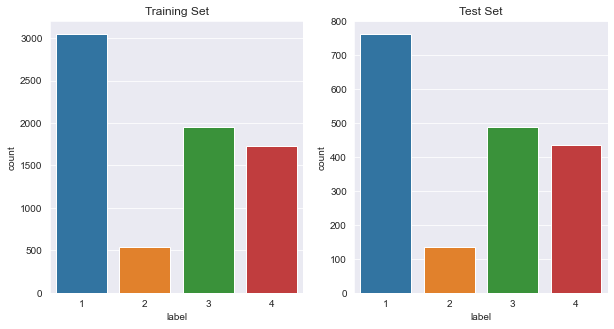

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("darkgrid")
fig, axes = plt.subplots(1,2,figsize=(10,5))
sns.countplot(y_train,ax=axes[0]).set_title('Training Set')
sns.countplot(y_test,ax=axes[1]).set_title('Test Set')

In [ ]:
def test_classes__property():
    # Test that classes_ property matches best_estimator_.classes_
    X = np.arange(100).reshape(10, 10)
    y = np.array([0] * 5 + [1] * 5)
    Cs = [.1, 1, 10]

    grid_search = GridSearchCV(LinearSVC(random_state=0), {'C': Cs})
    grid_search.fit(X, y)
    assert_array_equal(grid_search.best_estimator_.classes_,
                       grid_search.classes_)

    # Test that regressors do not have a classes_ attribute
    grid_search = GridSearchCV(Ridge(), {'alpha': [1.0, 2.0]})
    grid_search.fit(X, y)
    assert not hasattr(grid_search, 'classes_')

    # Test that the grid searcher has no classes_ attribute before it's fit
    grid_search = GridSearchCV(LinearSVC(random_state=0), {'C': Cs})
    assert not hasattr(grid_search, 'classes_')

    # Test that the grid searcher has no classes_ attribute without a refit
    grid_search = GridSearchCV(LinearSVC(random_state=0),
                               {'C': Cs}, refit=False)
    grid_search.fit(X, y)
    assert not hasattr(grid_search, 'classes_') 